In [2]:
import pandas as pd
import geopandas as gp
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [3]:
data=pd.read_csv("C:/Users/guswn/OneDrive/바탕 화면/bike/자전거+교통사고_20231029114833.csv",encoding="utf-8")
boundary = gp.read_file("C:/Users/guswn/Downloads/LARD_ADM_SECT_SGG_서울/LARD_ADM_SECT_SGG_11.shp",encoding='cp949')

In [4]:
#header 변경
data.columns = data.iloc[0]
data = data[1:]

In [5]:
data=data.drop("자치구별(1)",axis=1)

In [6]:
#서울시 총합 데이터 삭제
data= data.iloc[2:]

In [7]:
#2018년 데이터만 추출
data_18 = data.iloc[:,:2].join(data.iloc[:,-15:-12])

In [8]:
data_18
data_18.iloc[:,2:] = data_18.iloc[:,2:].apply(pd.to_numeric, errors='coerce')

In [9]:
data_18

,자치구별(2),유형별(1),발생건수 (건),사망자수 (명),부상자수 (명)
3,종로구,자전거 가해자사고,21,NaN,22
4,종로구,자전거 피해자사고,19,NaN,19
5,중구,자전거 가해자사고,14,1.0,13
6,중구,자전거 피해자사고,13,NaN,13
7,용산구,자전거 가해자사고,26,NaN,34
8,용산구,자전거 피해자사고,30,1.0,35
9,성동구,자전거 가해자사고,47,1.0,51
10,성동구,자전거 피해자사고,69,1.0,72
11,광진구,자전거 가해자사고,70,2.0,72
12,광진구,자전거 피해자사고,45,NaN,49


In [11]:
attack=data_18[data_18["유형별(1)"]=="자전거 가해자사고"]

In [12]:
victim=data_18[data_18["유형별(1)"]=="자전거 피해자사고"]

In [13]:
victim

,자치구별(2),유형별(1),발생건수 (건),사망자수 (명),부상자수 (명)
4,종로구,자전거 피해자사고,19,NaN,19
6,중구,자전거 피해자사고,13,NaN,13
8,용산구,자전거 피해자사고,30,1.0,35
10,성동구,자전거 피해자사고,69,1.0,72
12,광진구,자전거 피해자사고,45,NaN,49
14,동대문구,자전거 피해자사고,99,2.0,101
16,중랑구,자전거 피해자사고,62,NaN,65
18,성북구,자전거 피해자사고,34,NaN,34
20,강북구,자전거 피해자사고,41,NaN,42
22,도봉구,자전거 피해자사고,57,NaN,58


In [14]:
attack.sort_values(by="발생건수 (건)",ascending=False) 
attack=attack.set_index("자치구별(2)")
aaa = attack['발생건수 (건)'].to_dict()


In [15]:
victim.sort_values(by="발생건수 (건)",ascending=False) 
victim=victim.set_index("자치구별(2)")
bbb = victim['발생건수 (건)'].to_dict()



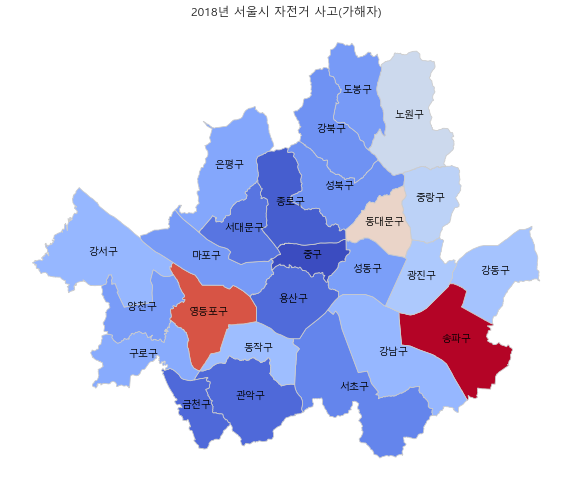

In [16]:
heatmap_df = boundary.copy()
heatmap_df['heatmap_value'] = heatmap_df['SGG_NM'].map(aaa)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
heatmap_df.plot(column='heatmap_value', cmap='coolwarm'ㅌ   , linewidth=0.8, ax=ax, edgecolor='0.8')
plt.title('2018년 서울시 자전거 사고(가해자)')
ax.set_axis_off()
for idx, row in heatmap_df.iterrows():
    plt.annotate(text=row['SGG_NM'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y), fontsize=10, ha='center', color='black')

plt.show()

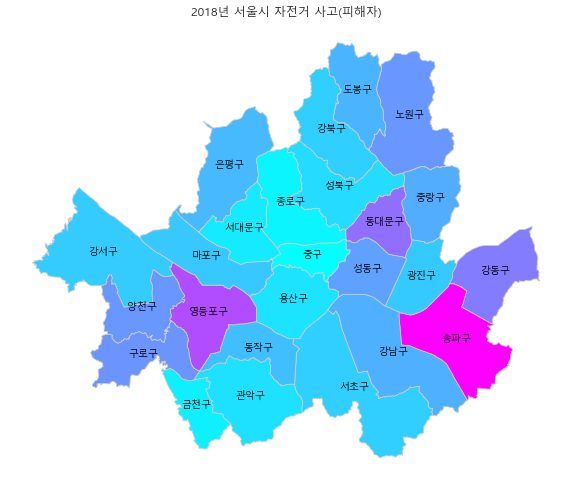

In [86]:
heatmap_df = boundary.copy()
heatmap_df['heatmap_value'] = heatmap_df['SGG_NM'].map(bbb)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
heatmap_df.plot(column='heatmap_value', cmap='cool', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.title('2018년 서울시 자전거 사고(피해자)')
ax.set_axis_off()
for idx, row in heatmap_df.iterrows():
    plt.annotate(text=row['SGG_NM'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y), fontsize=10, ha='center', color='black')

plt.show()

In [55]:
using=pd.read_csv("C:/Users/guswn/OneDrive/바탕 화면/bike/자전거+이용률_20231029114635.csv",encoding="utf-8")

In [56]:
#header 변경
using.columns = using.iloc[0]
using = using[1:]

In [61]:
using.iloc[:,2:] = using.iloc[:,2:].apply(pd.to_numeric, errors='coerce')
using.fillna(0,inplace=True)
using

,구분별(1),구분별(2),통학/통근,대중교통 환승,근거리 교통수단,레저용,이용하지 않음
1,서울시,소계,1.8,0.3,4.7,5.6,87.6
2,성별,남성,2.9,0.5,6.4,8.0,82.2
3,성별,여성,0.7,0.2,3.1,3.3,92.7
4,연령별,10대,8.6,0.2,10.8,7.1,73.2
5,연령별,20대,1.8,0.8,10.1,9.2,78.0
6,연령별,30대,1.6,0.3,3.5,8.3,86.2
7,연령별,40대,1.4,0.2,2.5,6.0,89.8
8,연령별,50대,1.3,0.1,1.8,4.4,92.4
9,연령별,60대 이상,1.4,0.2,4.3,1.8,92.3
10,학력별,중졸 이하,1.0,0.3,7.3,1.3,90.2


In [62]:
using["사용량"]=using["통학/통근"]+using["대중교통 환승"]+using["근거리 교통수단"]+using["레저용"]

In [72]:
using1=using.iloc[26:51]

SyntaxError: invalid syntax (771958698.py, line 1)

In [74]:
using2=using1.drop(["구분별(1)","통학/통근","대중교통 환승","근거리 교통수단","레저용","이용하지 않음"],axis=1)

In [75]:
using2=using2.set_index("구분별(2)")
ccc = using2['사용량'].to_dict()

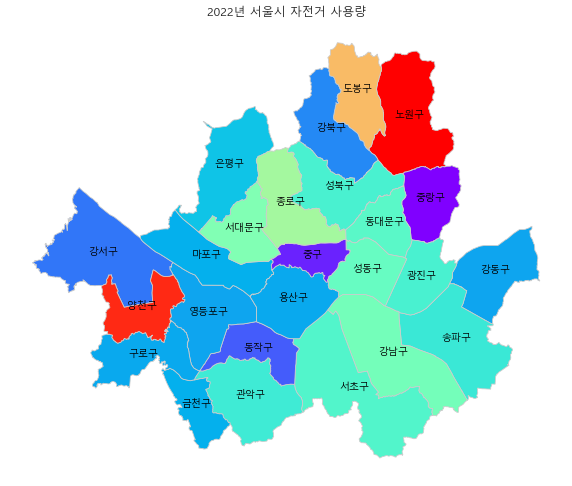

In [77]:
heatmap_df = boundary.copy()
heatmap_df['heatmap_value'] = heatmap_df['SGG_NM'].map(ccc)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
heatmap_df.plot(column='heatmap_value', cmap='rainbow', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.title('2022년 서울시 자전거 사용량')
ax.set_axis_off()
for idx, row in heatmap_df.iterrows():
    plt.annotate(text=row['SGG_NM'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y), fontsize=10, ha='center', color='black')

plt.show()